In [2]:
!pip install git+https://github.com/mathLab/EZyRB
!if [ -d "data" ]; then; else; mkdir data; wget -P data https://github.com/giovastabile/roma_phd_course_exercises/raw/master/LESSON_1/data/tut1_coord.npy; wget -P data https://github.com/giovastabile/roma_phd_course_exercises/raw/master/LESSON_1/data/tut1_mu.npy; wget -P data https://github.com/giovastabile/roma_phd_course_exercises/raw/master/LESSON_1/data/tut1_snapshots.npy; wget -P data https://github.com/giovastabile/roma_phd_course_exercises/raw/master/LESSON_1/data/tut1_triangles.npy; fi;

  Cloning https://github.com/mathLab/EZyRB to /tmp/pip-req-build-t4zlr9f2
  Running command git clone --filter=blob:none --quiet https://github.com/mathLab/EZyRB /tmp/pip-req-build-t4zlr9f2
  Resolved https://github.com/mathLab/EZyRB to commit 677794b607c6c23ec33d504d9a82eaa67a28eb73
  Preparing metadata (setup.py) ... done
/bin/bash: -c: line 1: syntax error near unexpected token `;'
/bin/bash: -c: line 1: `if [ -d "data" ]; then; else; mkdir data; wget -P data https://github.com/giovastabile/roma_phd_course_exercises/raw/master/LESSON_1/data/tut1_coord.npy; wget -P data https://github.com/giovastabile/roma_phd_course_exercises/raw/master/LESSON_1/data/tut1_mu.npy; wget -P data https://github.com/giovastabile/roma_phd_course_exercises/raw/master/LESSON_1/data/tut1_snapshots.npy; wget -P data https://github.com/giovastabile/roma_phd_course_exercises/raw/master/LESSON_1/data/tut1_triangles.npy; fi;'


In [4]:
import numpy as np
import matplotlib.tri as mtri
import matplotlib.pyplot as plt
import sys
from ezyrb import POD, RBF, Database
from ezyrb import ReducedOrderModel as ROM
np.set_printoptions(threshold=sys.maxsize)

(304,)
[[ 0.5 -0.2]
 [ 8.6  0.1]
 [ 5.3  0.8]
 [ 9.4  0.1]
 [ 7.3 -0.8]
 [ 0.2  0.8]
 [ 3.5 -0.5]
 [ 0.3  0.6]]


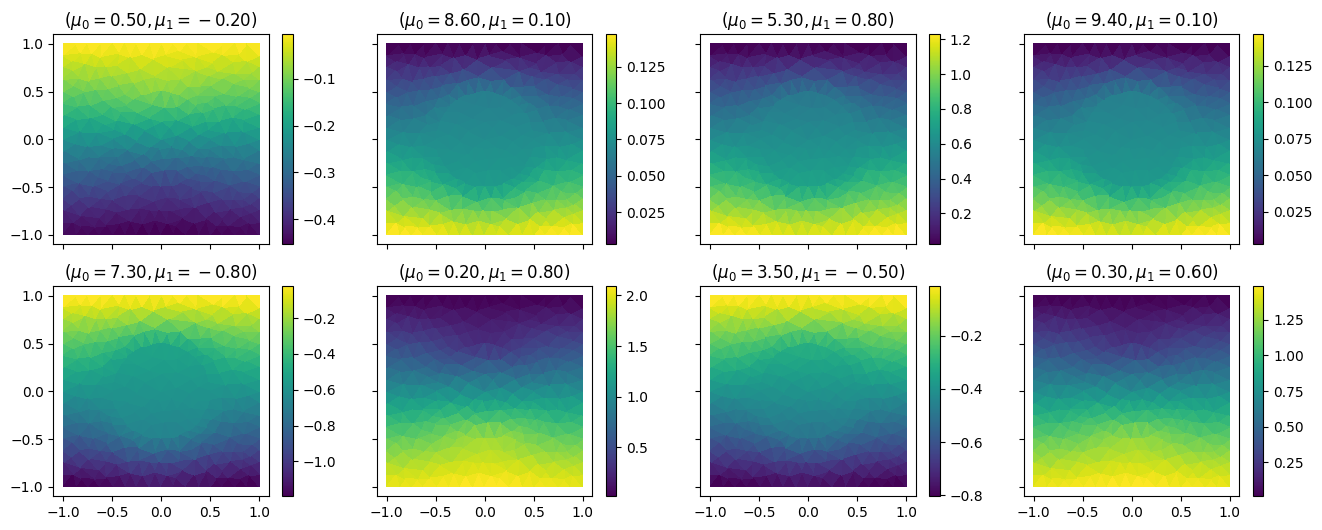

In [5]:
snapshots = np.load('data/tut1_snapshots.npy')
param = np.load('data/tut1_mu.npy')
print(snapshots[0].shape)
print(param)

tri = np.load('data/tut1_triangles.npy')
coord = np.load('data/tut1_coord.npy')
triang = mtri.Triangulation(coord[0],coord[1],tri)

fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(16, 6), sharey=True, sharex=True)
ax = ax.flatten()
for i in range(8):
    ax[i].triplot(triang, 'b-', lw=0.1)
    cm = ax[i].tripcolor(triang, snapshots[i])
    fig.colorbar(cm, ax=ax[i])
    ax[i].set_title('($\mu_0={:5.2f}, \mu_1={:5.2f})$'.format(*param[i]))
    
plt.show()

In [ ]:
# First of all, we create a `Database` object from the parameters and the snapshots.
db = Database(param, snapshots)


# Then we need a reduction object. In this case we use the proper orthogonal decomposition so we create a `POD` object. We use here all the default parameters, but for the complete list of available arguments we refer to original documentation of [POD](https://mathlab.github.io/EZyRB/pod.html) class.
pod = POD('svd')
#pod = POD('correlation_matrix', rank=8, save_memory=False)
pod = POD().fit(snapshots.T)
print("Printing POD singular values")
print(pod.singular_values)
print(pod.singular_values.size)
pod_modes = np.copy(pod.modes)
print(pod_modes.shape)
pod_modes.reshape(304,8)
print(pod_modes.shape)
pod_modes=pod_modes.T
print(pod_modes.shape)
print(pod_modes[0].shape)

fig2, ax2 = plt.subplots(nrows=2, ncols=4, figsize=(16, 6), sharey=True, sharex=True)
ax2 = ax2.flatten()
for i in range(8):
    ax2[i].triplot(triang, 'b-', lw=0.1)
    cm2 = ax2[i].tripcolor(triang, pod_modes[i])
    fig2.colorbar(cm2, ax=ax2[i])
    ax2[i].set_title('Mode '+str(i))
    

plt.show()


fig3, ax3 = plt.subplots(nrows=1, ncols=1, figsize=(6, 6), sharey=True, sharex=True)
ax3.semilogy(pod.singular_values,'-*')
ax3.grid()
plt.show()